In [1]:
# ###################################
# Group ID : 741
# Members : Simon Loi Baks, Vasiliki Ismiroglou
# Date : 14/10/2023
# Lecture: Lecture 7 Support Vector Machines
# Dependencies: scipy.io.loadmat, sklearn.svm.SVC, sklearn.pipeline, sklearn.preprocessing.StandardScaler, sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
# sklearn.metrics.confusion_matrix, sklearn.metrics.ConfusionMatrixDisplay, numpy, matplotlib
# Python version:3.11.5
# Functionality: Reducing dimensionality of data and performing multi-class classification using logistic regression, multilayer perceptron and LDA
# ###################################

In [3]:
import sys
sys.path.append('../tools/')
from functions import create_complete_datasets
from scipy.io import loadmat

In [ ]:
file = "../data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm = SVC(kernel='rbf',
          degree = 3,
          gamma = 'scale',
          max_iter = -1,
          random_state=42
)

clf = make_pipeline(StandardScaler(), svm)
clf.fit(train_set, train_targets)

In [5]:
predictions = clf.predict(test_set)

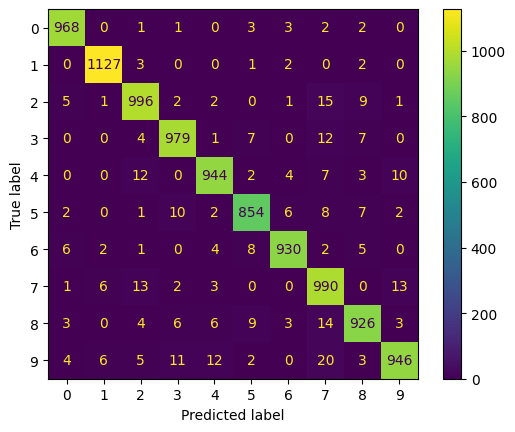

In [26]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(test_targets, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = svm.classes_)
disp.plot()
plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
clf1 = make_pipeline(StandardScaler(), lda)
clf1.fit(train_set, train_targets)

In [28]:
predictions_lda = clf1.predict(test_set)

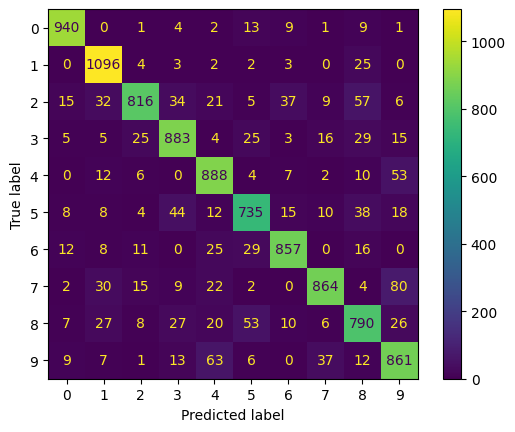

In [30]:
cm_lda = confusion_matrix(test_targets, predictions_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=lda.classes_)
disp.plot()
plt.show()